# 회귀 트리

* 사이킷런의 결정 트리 및 결정 트리 기반의 앙상블 알고리즘은 분류 뿐만 아니라 회귀도 가능합니다.
* 이는 트리가 **CART(Classification and Regression Tree)** 를 기반으로 만들어 졌기 때문입니다.
* CART는 분류 뿐만 아니라 회귀도 가능한 트리 분할 알고리즘입니다. 
* CART회귀 트리는 분류와 유사하게 분할을 하며, 분할 기준은 RSS가 최소가 될 수 있는 기준을 찾아서 분할 됩니다. 
* 최종 분할이 완료 된 후에 각 분할 영역에 있는 데이터 결정 값들의 평균 값으로 학습/예측합니다. 


In [ ]:
# 회귀트리이론 정리, DecisionTree분류와 같이 기억하기!

In [ ]:
# 데이터분석기사 시험에 카트 내용 종종 나옴!!


# 분할 기준
# 트리 분류에서는 불순도가 적어지는 쪽으로 선택한다
# 회귀에서는 RSS(실제값-예측값 즉 오차으ㅏㅣ 제곱의 합)가 최소가 될수있는 기준.

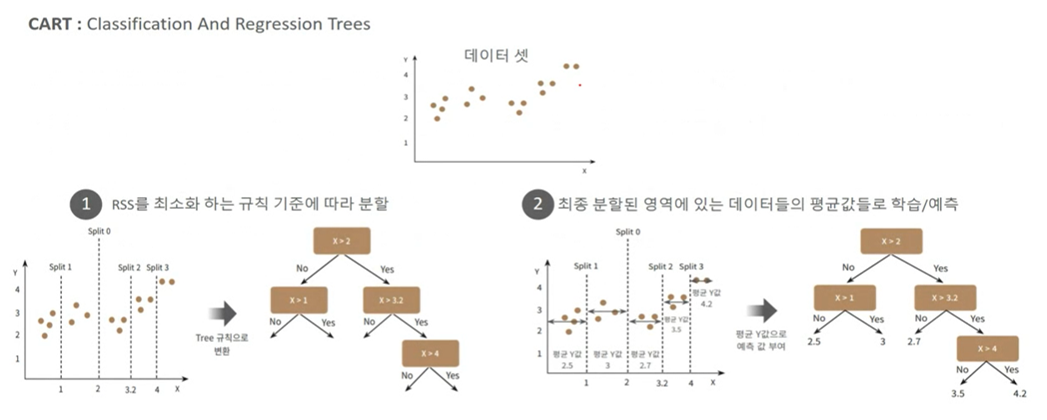

## 회귀 트리의 오버 피팅

* 회귀 트리 역시 복잡한 트리 구조를 가질 경우 오버 피팅되기 쉽습니다. 
* 트리의 크기와 노드 개수의 제한 등의 방법을 통해 오버 피팅을 개선합니다. 
* 하이퍼파라미터의 개수가 많으므로 CV와 함께 사용해서 튜닝합니다. 

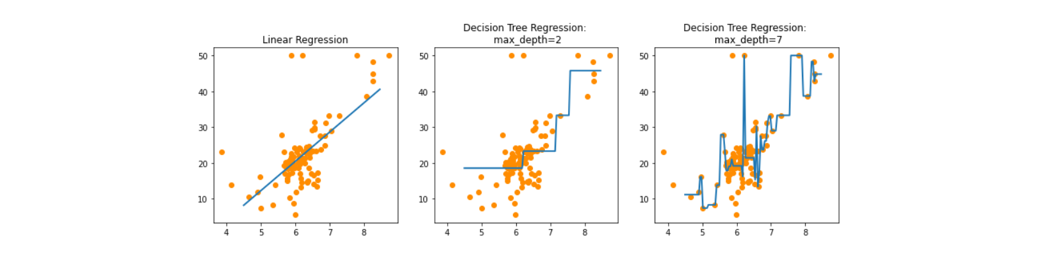

## 사이킷런의 회귀 트리 지원

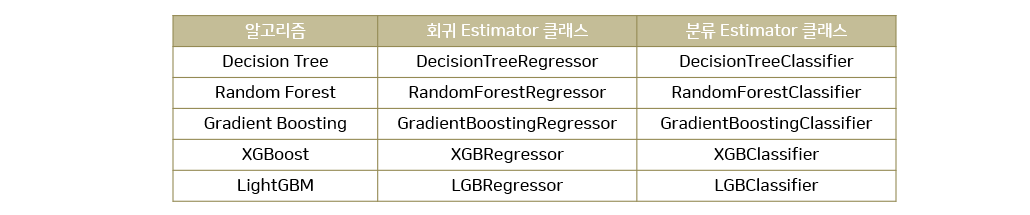

In [ ]:
# --Regressor은 회귀
# --Classifier은 분류 
# 각각의 내부알고리즘은 회귀별로 분류별로 같다

---

## 데이터 로딩

In [7]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings("ignore", category= FutureWarning)

# boston 데이타셋 로드
boston = load_boston() # 보스턴 집값 내장 데이터

# boston 데이타셋 DataFrame 변환 
bostonDF =pd.DataFrame(boston.data,columns=boston.feature_names)

In [8]:
bostonDF

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [6]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [4]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [10]:
# PRICE 컬럼으로 DataFrame에 추가함. 
bostonDF['PRICE'] = boston.target # 레이블
bostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
# boston. 찍으면 내장데이터에 있는 것들 보임
dir(boston) # 객체안에 어떤 객체나 속성이 있는지 살펴볼 때 명령어

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'target']

In [12]:
boston.filename

'boston_house_prices.csv'

In [14]:
bostonDF.info() 
# 13  PRICE    506 non-null    float64 레이블이 실수의 연속값. 
# -> 회귀를 적용하는게 맞는지 확일할때 info로 레이블 데이터단위 보기

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


[데이터 속성]
* CRIM: 지역별 범죄 발생률  
* ZN: 25,000평방피트를 초과하는 거주 지역의 비율
* NDUS: 비상업 지역 넓이 비율
* CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
* NOX: 일산화질소 농도
* RM: 거주할 수 있는 방 개수
* AGE: 1940년 이전에 건축된 소유 주택의 비율
* DIS: 5개 주요 고용센터까지의 가중 거리
* RAD: 고속도로 접근 용이도
* TAX: 10,000달러당 재산세율
* PTRATIO: 지역의 교사와 학생 수 비율
* B: 지역의 흑인 거주 비율
* LSTAT: 하위 계층의 비율
* MEDV: 본인 소유의 주택 가격(중앙값)

In [ ]:
# 네이버부동산, 호갱노노 집값긁어와서 에코델타 신도시 집값예측 등

## EDA

In [16]:
#통계 정보
bostonDF.describe().T
# 레이블부터 확인

# ZN은 범주형인가

# B는 단위차이가 큼 
# -> 트리계열은 둔하지만, 거리기반이나 숫자가 회귀계산에 영향을 미치는 알고리즘이라면 고려해야함


,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


<AxesSubplot: >

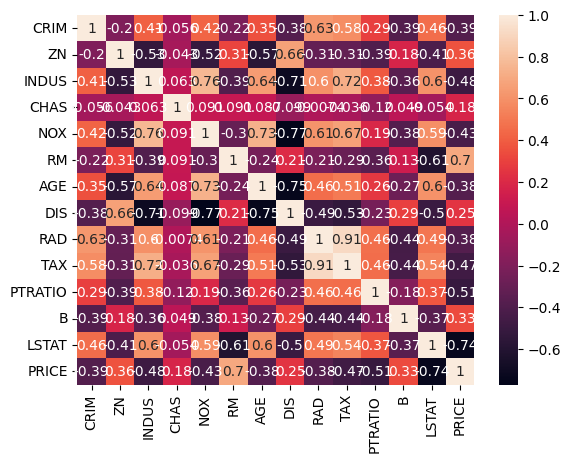

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# price와 상관관계가 높은 피처들 탐색
bostonDF.corr() # 상관계수 : 각 피처간의 상관도(영향을 미치는 정도)를 통계적으로 확인

# 상관계수를 시각화에 활용
# plt.subplot(figsize = (12,5))
plt.subplot()
sns.heatmap(bostonDF.corr(), annot=True) #히트맵 # annot=True : 상관계수 숫자 보여줌

# 상관관계를 볼때 히트맵 사용
# 0이면 상관이 없다. 
# 1에가까우면 양의 상관관계 : 내가 올라가면 너도올라감 같이올라감 비례
# -1에 가까우면 음의 상관관계 : 내가 올라가면 너는 내려감. 반대. 반비례

In [ ]:
# RM, PTRATIO, LSTAT 관계높음
# 피처셀렉션해야할때 해당피처를 예의주시해야함

> LSTAT, RM,PTRATIO가 PRICE와 상관관계가 높음<br>
하위계층의 비율, 방의 개수, 교사와 학생수 비율 -> 가격에 많은 영향

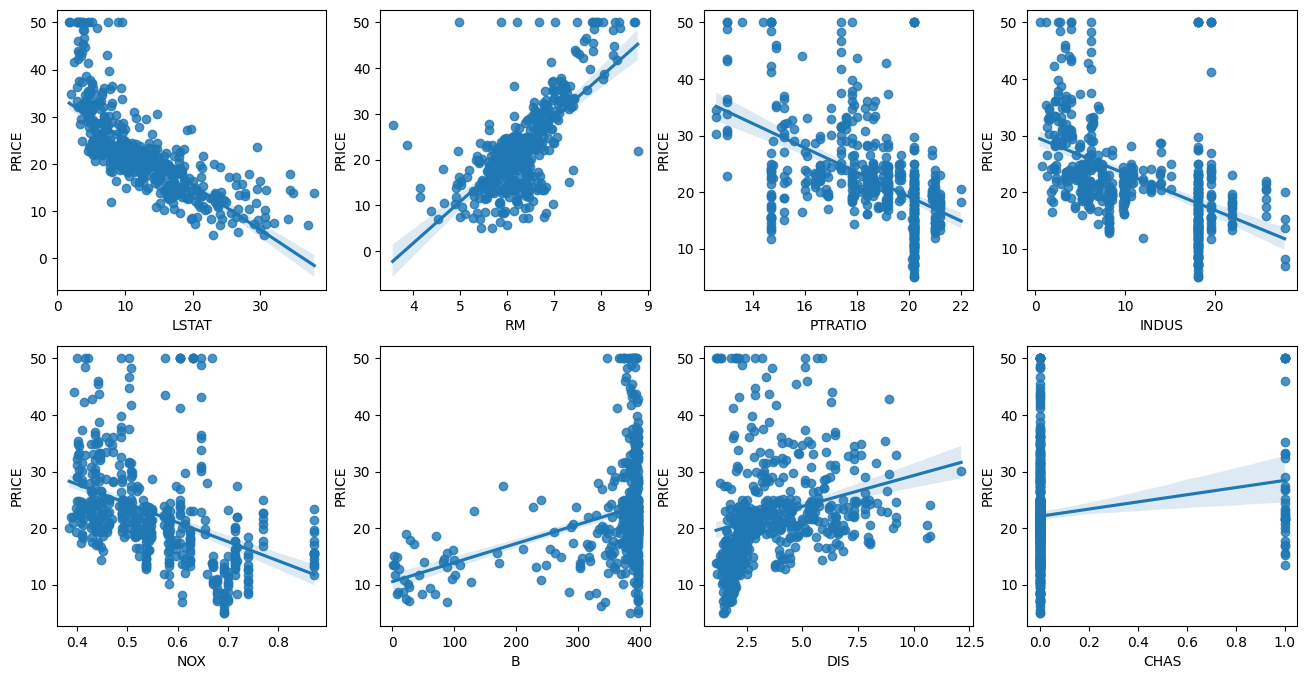

In [26]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,8) , ncols=4 , nrows=2)

# lm_features = ['LSTAT','RM','PTRATIO','INDUS','NOX','ZN','AGE','RAD']
lm_features = ['LSTAT','RM','PTRATIO','INDUS','NOX','B','DIS','CHAS']
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature , y='PRICE',data=bostonDF , ax=axs[row][col])

In [ ]:
# chas는 0,1뿐인 범주형 데이터인가봄

>* RM 방 개수가 많으면 주택 가격에 영향을 주고 우상향(양의 상관관계)
>* LSTAT 강한 음의 상관관게, 하위계층 비율이 높으면 주택가격은 내려가는 관계
>* CHAS는 명목형 자료형임을 알 수 있음 (0과 1만 존재)

In [30]:
#레이블의 분포 : value_counts() 
bostonDF['PRICE'].value_counts() 

50.0    16
25.0     8
22.0     7
21.7     7
23.1     7
        ..
32.9     1
34.6     1
30.3     1
33.3     1
8.1      1
Name: PRICE, Length: 229, dtype: int64

<AxesSubplot: >

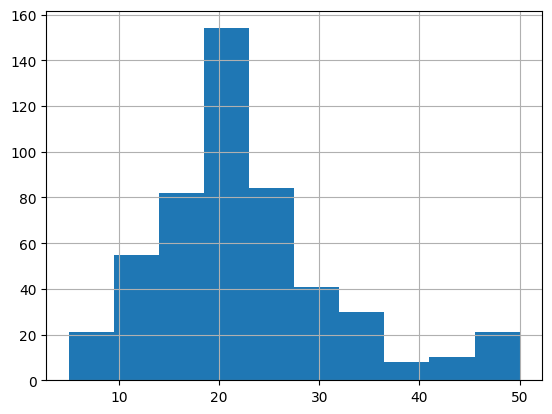

In [29]:
#레이블의 히스토그램 :hist()
bostonDF['PRICE'].hist()


<AxesSubplot: >

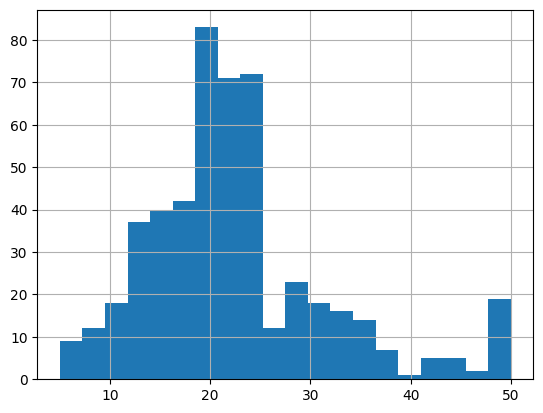

In [31]:
bostonDF['PRICE'].hist(bins=20)

In [ ]:
# 정규분표형태가 이상적
# 해당경우에 종모양이 나오지만, 우측에 값들이 이상치인지 의미있는 값인지 고려해야함

<div class="alert alert-block" style="background-color:#8FBDD3">
<font size="3em" style="font-weight:bold;color:#3f8dbf;"></font>
트리계열은 데이터 스케일링의 필요성이 다소 적으므로 스케일링 과정은 패스한다.  <br>
</div> 

## 모델 학습: 교차검증 + 랜덤포레스트

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor # 회귀 - 배깅 - 랜덤포레스트

rf = RandomForestRegressor(random_state=0, n_estimators=1000)

#score:neg_mean_squared_error
# cv:5개 # 테스트 세트만들기참고

#테스트 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2, random_state=0)
scores = cross_val_score(rf , X_train , y_train , scoring='accuracy', cv=5)
# 성능 지표는 정확도(accuracy) , 교차 검증 세트(cv)는 5개 
scores = cross_val_score(rf , boston.data , boston.target , scoring='accuracy', cv=5)
# test용은 마지막에 하려고 kipping하고, 훈련용 데이터만 넣어줌.
# cv=5 5번 교차검증실행. for문 5회 돈 것과 같은 내용


# Linear Regression OLS로 학습/예측/평가 수행. 
rf.fit(X_train ,y_train )
y_preds = rf.predict(X_test)

from sklearn.metrics import mean_squared_error , r2_score
mse = mean_squared_error(y_test, y_preds)

neg_mse_scores = cross_val_score(    ) # 교차검증과 같이 진행

#MSE : 에러들의 평균
# mse = mean_squared_error(y_test, preds)

In [ ]:
rmse_scores  = np.sqrt(-1 * neg_mse_scores)

avg_rmse = np.mean(rmse_scores)

print(' 5 교차 검증의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 교차 검증의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))

In [ ]:
# 함수 생성함


## 모델학습:회귀트리클래스 모두사용

## 변수 중요도

In [ ]:
import seaborn as sns
%matplotlib inline

rf_reg = RandomForestRegressor(n_estimators=1000)

# 앞 예제에서 만들어진 X_data, y_target 데이터 셋을 적용하여 학습합니다.   
rf_reg.fit(X_data, y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_data.columns )
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x= feature_series, y=feature_series.index)


---